In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Customer_data/Eldo_case.csv', delimiter=';')

In [20]:
df.columns

Index(['Login', 'No заказа', 'Дата поступления заказа',
       'Название товара в Kaspi Магазине', 'Название в системе продавца',
       'Артикул', 'Сумма', 'Категория', 'Адрес самовывоза/доставки',
       'Дата изменения статуса', 'Статус', 'Причина отмены', 'Способ оплаты',
       'Способ доставки', 'Курьерская служба', 'Принял', 'Выдал', 'Отменил',
       'Оценка покупателя', 'Отзыв покупателя', 'Дата публикации отзыва',
       'Оформил', 'Количество', 'Стоимость доставки для покупателя',
       'Стоимость доставки для продавца', 'Компенсация за доставку',
       'Требуется подписание', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [3]:
df['Дата поступления заказа'] = pd.to_datetime(df['Дата поступления заказа'], format='%d.%m.%Y')

In [23]:
df['Статус'].value_counts()

Выдан                              650
Отменен                            638
Возврат                              6
Ожидает возврата каспи доставки      2
Name: Статус, dtype: int64

In [4]:
df_sold = df[df['Статус']=='Выдан']

In [5]:
df_sold.sort_values(by=['Дата поступления заказа'], inplace=True)

/Users/batyagg/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [30]:
date(2022, 6, 1)

datetime.date(2022, 6, 1)

In [14]:
df_sold = df_sold[datetime(2022, 6, 1) <= df_sold['Дата поступления заказа']]
df_sold = df_sold[datetime(2022, 9, 1) >= df_sold['Дата поступления заказа']]

In [7]:
df_sold.groupby(pd.Grouper(key='Дата поступления заказа', freq='M')).sum()

,No заказа,Сумма,Оформил,Количество,Стоимость доставки для покупателя,Стоимость доставки для продавца,Компенсация за доставку,Требуется подписание
Дата поступления заказа,,,,,,,,
2022-06-30,47536210329,42191157,0.0,246,5000.0,262011.0,0.0,0.0
2022-07-31,33331302107,43560129,0.0,169,4000.0,0.0,0.0,0.0
2022-08-31,34452430076,13037020,0.0,165,4000.0,0.0,0.0,0.0
2022-09-30,1500506000,1171227,0.0,7,0.0,0.0,0.0,0.0


In [49]:
cnts = df.groupby(pd.Grouper(key='Дата поступления заказа', freq='D')).count()['Login']

In [54]:
cnts = cnts.sort_values()

In [56]:
cnts.value_counts()

0     11
3      9
5      6
9      6
7      5
8      5
13     5
17     5
2      4
6      4
12     4
15     4
1      3
29     3
27     3
24     3
16     3
14     3
11     3
10     3
22     2
25     2
4      2
34     2
18     1
19     1
20     1
21     1
23     1
30     1
32     1
40     1
51     1
Name: Login, dtype: int64

In [59]:
hist_data = pd.DataFrame({'order_num': cnts, 'with_bot': [True if c > 15 else False for c in cnts]})

In [66]:
hist_data

,order_num,with_bot
Дата поступления заказа,,
2022-07-25,1,False
2022-08-01,1,False
2022-08-06,1,False
2022-08-05,2,False
2022-05-23,2,False
...,...,...
2022-06-13,32,True
2022-08-19,34,True
2022-05-28,34,True


In [67]:
hist_data = hist_data[hist_data.order_num > 2]

In [68]:
import seaborn as sns

<AxesSubplot:title={'center':'Кол-во заказов в день'}, xlabel='order_num', ylabel='Probability'>

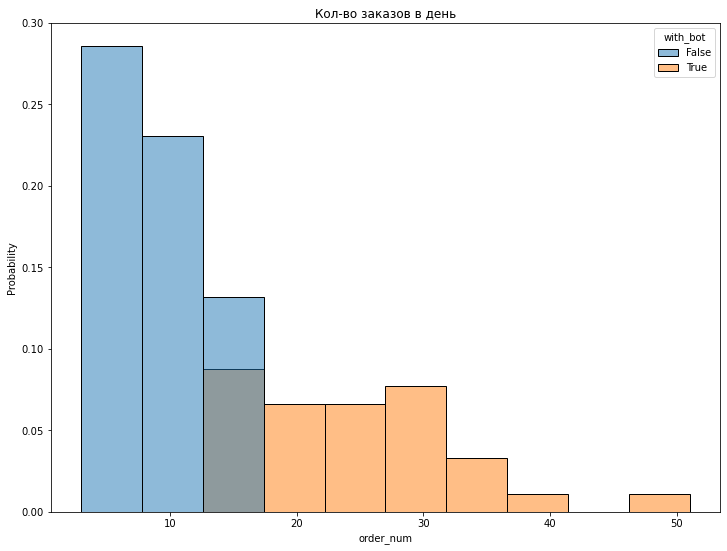

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.set_title('Кол-во заказов в день')
sns.histplot(hist_data, x='order_num', hue='with_bot', stat='probability')

In [8]:
df_sold

,Login,No заказа,Дата поступления заказа,Название товара в Kaspi Магазине,Название в системе продавца,Артикул,Сумма,Категория,Адрес самовывоза/доставки,Дата изменения статуса,...,Отзыв покупателя,Дата публикации отзыва,Оформил,Количество,Стоимость доставки для покупателя,Стоимость доставки для продавца,Компенсация за доставку,Требуется подписание,Unnamed: 27,Unnamed: 28
1059,lucky_erik@mail.ru,202399397,2022-06-01,ALMACOM ACH-12I белый + монтажный комплект,almacom ACH-12I белый + монтажный комплект,4200748_12627024,243490,Кондиционеры,"Нур-Султан, проспект Улы Дала, 23, 76",04.06.2022,...,Без отзыва,NaN,NaN,1,0.0,3919.0,NaN,NaN,03.06.2022,12627024_177
1060,lucky_erik@mail.ru,202464584,2022-06-01,ALMACOM ACH-12AF белый + монтажный комплект,almacom ACH-12AF белый + монтажный комплект,4200714_12627024,173361,Кондиционеры,"Шымкент, микрорайон Северо-Запад, 1861,",04.06.2022,...,Без отзыва,NaN,NaN,1,0.0,3919.0,NaN,NaN,03.06.2022,12627024_177
1000,lucky_erik@mail.ru,202404712,2022-06-01,Artel Apetito 50 10-E белый,Artel Apetito 50 10-E белый,100347321_12627024,73716,Кухонные плиты,"Алматы, проспект Гагарина, 236Б, Авто блеск",02.06.2022,...,Без отзыва,NaN,NaN,1,0.0,0.0,0.0,NaN,NaN,NaN
1270,lucky_erik@mail.ru,202478267,2022-06-01,ALMACOM ACH-18AS белый + медная инсталляция,almacom ACH-18AS белый + медная инсталляция,4201139_12627024,253794,Кондиционеры,"Атырау, микрорайон Атырау-2, 7-я улица, 23,",08.06.2022,...,Без отзыва,NaN,NaN,1,0.0,3919.0,NaN,NaN,03.06.2022,12627024_177
1011,lucky_erik@mail.ru,202397208,2022-06-01,ALMACOM ACH-18AS белый + медная инсталляция,almacom ACH-18AS белый + медная инсталляция,4201139_12627024,253838,Кондиционеры,"Актау, 26-й микрорайон, 31, 48",08.06.2022,...,Без отзыва,NaN,NaN,1,0.0,3919.0,NaN,NaN,02.06.2022,12627024_177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,amangeldieva.nursulu@bk.ru,214355670,2022-09-01,Gree-12 Bora GWH12AAB-K3NNA1A белый,Gree-12 Bora GWH12AAB-K3NNA1A белый,4200978_14699005,167878,Кондиционеры,"Костанай, Садовая улица, 100/1, Офис",09.09.2022,...,Без отзыва,NaN,NaN,1,0.0,0.0,NaN,NaN,03.09.2022,14699005_PP1
205,amangeldieva.nursulu@bk.ru,214318329,2022-09-01,Artel ART-1190 Rapido Touch белый,Artel ART-1190 Rapido Touch белый,101529877_14699005,59418,Вытяжки,"Атырау, микрорайон Самал, 23-я улица, 28,",07.09.2022,...,Без отзыва,NaN,NaN,1,0.0,0.0,NaN,NaN,02.09.2022,14699005_PP1
425,amangeldieva.nursulu@bk.ru,214374468,2022-09-01,Artel HD 345RN Steel серый,Artel HD 345RN Steel серый,100531318_14699005,168988,Холодильники,"Уральск, Алия Молдагулова, 24, 41",08.09.2022,...,Без отзыва,NaN,NaN,1,0.0,0.0,NaN,NaN,03.09.2022,14699005_PP1
152,amangeldieva.nursulu@bk.ru,214340105,2022-09-01,LG AC12BQ.NSJR серый,LG AC12BQ.NSJR серый,100606885_14699005,399988,Кондиционеры,"Тараз, переулок Жуанышева, 11,",05.09.2022,...,Без отзыва,NaN,NaN,1,0.0,0.0,NaN,NaN,02.09.2022,14699005_PP1


In [26]:
df_sold_june = df_sold[(datetime(2022, 6, 1) <= df_sold['Дата поступления заказа']) & 
                      (df_sold['Дата поступления заказа'] < datetime(2022, 7, 1))]

In [27]:
df_sold_july = df_sold[(datetime(2022, 7, 1) <= df_sold['Дата поступления заказа']) & 
                      (df_sold['Дата поступления заказа'] < datetime(2022, 8, 1))]

In [28]:
df_sold_august = df_sold[(datetime(2022, 8, 1) <= df_sold['Дата поступления заказа']) & 
                      (df_sold['Дата поступления заказа'] < datetime(2022, 9, 1))]

In [30]:
df_sold_june['Название товара в Kaspi Магазине'].value_counts().nlargest(10)

Red Line Ibox Crystal для Samsung A01 Core прозрачный       22
Gree Bora GWH12AAB-K3NNA1A + монтажный комплект             15
ALMACOM ACH-12AS белый + медная инсталляция                 14
ALMACOM ACH-12AF белый + монтажный комплект                 12
Gree-09 Bora GWH09AAA-K3NNA1A белый + монтажный комплект    10
ALMACOM AM-12L белый                                         8
Gree 24 Fairy Cold Plasma GWH24ACD-K3NNA1A белый             7
ALMACOM ACH-07AF белый + монтажный комплект                  7
Artel HS 117 RN белый                                        6
ALMACOM WH-25CB белый                                        5
Name: Название товара в Kaspi Магазине, dtype: int64

In [31]:
df_sold_july['Название товара в Kaspi Магазине'].value_counts().nlargest(10)

Gree Bora GWH12AAB-K3NNA1A + монтажный комплект          12
Red Line Ibox Crystal для Samsung A01 Core прозрачный    11
ALMACOM ACH-12AF белый + монтажный комплект              11
ALMACOM ACH-12AS белый + медная инсталляция              10
ALMACOM ACH-12I белый + монтажный комплект                9
ALMACOM AF1D-200 200 л белый                              5
Gree GWH28AGEXF-K3NNA1A                                   5
ALMACOM AR-50 белый                                       5
ALMACOM WH-25CB белый                                     5
ALMACOM AF1D-150 150 л белый                              4
Name: Название товара в Kaspi Магазине, dtype: int64

In [32]:
df_sold_august['Название товара в Kaspi Магазине'].value_counts().nlargest(10)

Red Line Ibox Crystal для Samsung A01 Core прозрачный    47
ALMACOM AF1D-150 150 л белый                             12
GRANDLUX HD 345 RN silver серебристый                     6
конвектор ALMACOM PC-27N                                  6
Ardesto LESH-Y305 черный                                  6
Artel HD 345RN Steel серый                                6
ALMACOM WH-25CB белый                                     5
инфракрасный обогреватель ALMACOM MH-22H                  3
Artel ART WH 2.0 80 Steel                                 3
Artel TE-60 L красный                                     3
Name: Название товара в Kaspi Магазине, dtype: int64

In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait

import re

In [2]:
driver = webdriver.Firefox()

In [ ]:
'sellers-table__buy-cell-button.button'

In [13]:
WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, '//tbody/tr[1]/td[7]/div[1]/div[1]')))

<selenium.webdriver.remote.webelement.WebElement (session="0063b9c4-792b-47fa-80de-5ad0f6f980d0", element="c9899f8d-3948-48ae-a1c3-efd59a36da02")>

In [14]:
a = WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.XPATH, '//tbody')))

In [22]:
html = a.get_attribute('innerHTML')

In [77]:
row = re.finditer('<tr>', html)
for r in row:
    r = html[r.span()[0]:]
    href = 'https://kaspi.kz' + r[r.find('href'):r.find('?')][6:]
    name = r.split('">')[2].split('<')[0]
    price = int(r.split('sellers-table__price-cell-text">')[1].split(' ')[0].replace('&nbsp;', ''))
    print(href)
    print(name)
    print(price)
    print()

https://kaspi.kz/shop/info/merchant/nemo/address-tab/
NEMO-KZ
20348

https://kaspi.kz/shop/info/merchant/9755036/address-tab/
Meta-
20352

https://kaspi.kz/shop/info/merchant/6715000/address-tab/
ASAstyle
20360

https://kaspi.kz/shop/info/merchant/telenova/address-tab/
Telenova
20400

https://kaspi.kz/shop/info/merchant/528028/address-tab/
Discount Shop
20490



'pagination__el'

In [4]:
v = WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.XPATH, "//li[contains(text(),'Следующая')]")))
v.click()
v.get_attribute('class')

'pagination__el'